In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as seabornInstance 
from sklearn import metrics

In [2]:
dataset = pd.read_csv('airlines.csv')

In [3]:
dataset.shape

(539383, 9)

In [4]:
dataset.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
print(dataset.Airline.unique())

['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']


In [6]:
labeling = preprocessing.LabelEncoder()

dataset['Airline'] = labeling.fit_transform(dataset['Airline'])
dataset['AirportFrom'] = labeling.fit_transform(dataset['AirportFrom'])
dataset['AirportTo'] = labeling.fit_transform(dataset['AirportTo'])

In [7]:
dataset

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1


In [8]:
# select features to be considered in clustering
    
x1 = dataset['Airline'].values
x2 = dataset['Flight'].values
x3 = dataset['AirportFrom'].values
x4 = dataset['AirportTo'].values
x5 = dataset['DayOfWeek'].values
x6 = dataset['Time'].values
x7= dataset['Length'].values
x8= dataset['Delay'].values

A = np.array(list(zip(x1,x2, x3, x4,x5,x6,x7,x8)))


In [9]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(A)
# Getting the cluster labels
labels = kmeans.predict(A)
# Centroid values
centroids = kmeans.cluster_centers_

labels = kmeans.labels_


In [10]:
# Comparing with scikit-learn centroids

print(centroids) # From sci-kit learn

[[8.73838943e+00 8.36660761e+02 1.46777929e+02 1.46922375e+02
  3.91938635e+00 8.05376158e+02 1.52957245e+02 4.67737875e-01]
 [1.04466276e+01 6.08739250e+03 1.40713526e+02 1.40780622e+02
  3.92141856e+00 8.02994828e+02 9.57263617e+01 4.08120879e-01]
 [9.71362838e+00 3.02671177e+03 1.41489434e+02 1.41286223e+02
  3.95260775e+00 7.97933600e+02 1.17661604e+02 4.28709816e-01]]


In [11]:
#colors = ["g.","r.","c.","y."]

#for i in range(len(A)):
    #print("coordinate:",A[i], "label:", labels[i])
    #plt.plot(A[i][0], A[i][1], colors[labels[i]], markersize = 10)

#plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, 
            #linewidths = 5, zorder = 10)

#plt.show()

In [12]:
#predict = kmeans.predict(A)
#dataset['cluster'] = predict
#pd.plotting.parallel_coordinates(dataset, 'cluster')

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

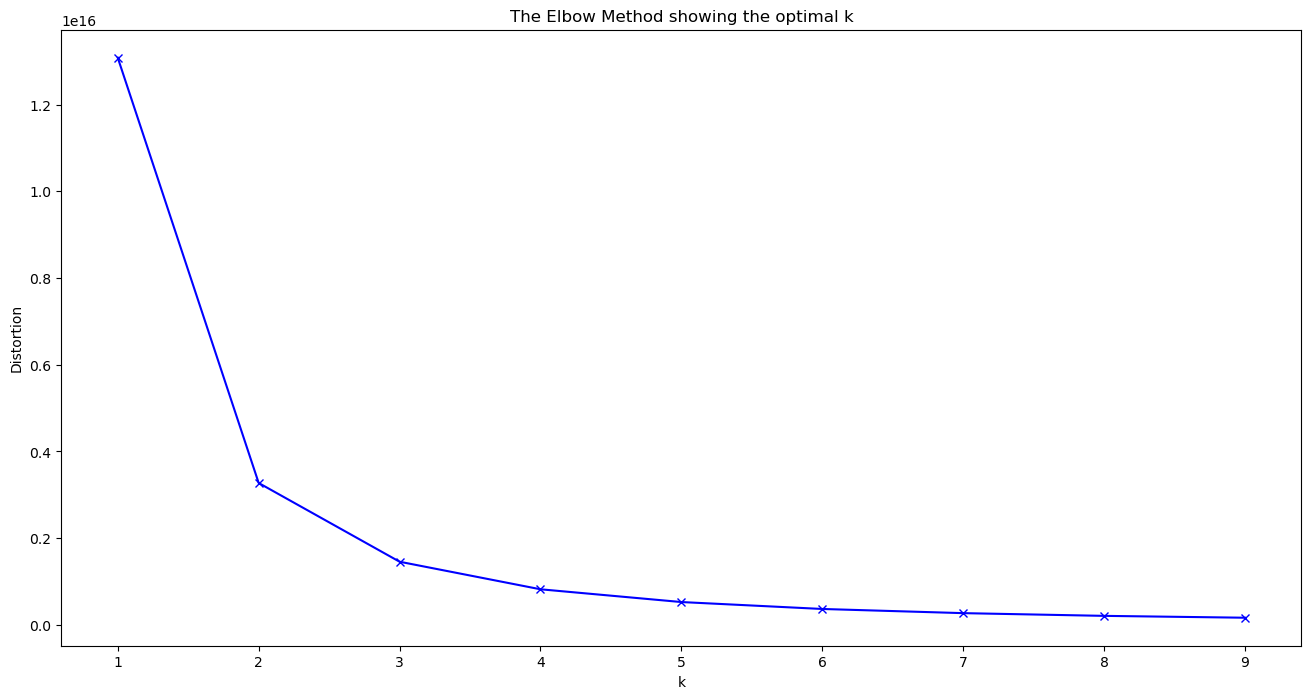

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Delay', axis=1)
y = dataset['Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

Accuracy on training set: 0.6534
Accuracy on test set: 0.6540
Feature importances:
[2.31322171e-01 4.94818088e-01 2.06737210e-02 3.15054975e-04
 2.61295675e-03 1.04759628e-02 2.13272010e-01 2.65100350e-02]
[[70762 19180]
 [36807 35066]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72     89942
           1       0.65      0.49      0.56     71873

    accuracy                           0.65    161815
   macro avg       0.65      0.64      0.64    161815
weighted avg       0.65      0.65      0.65    161815



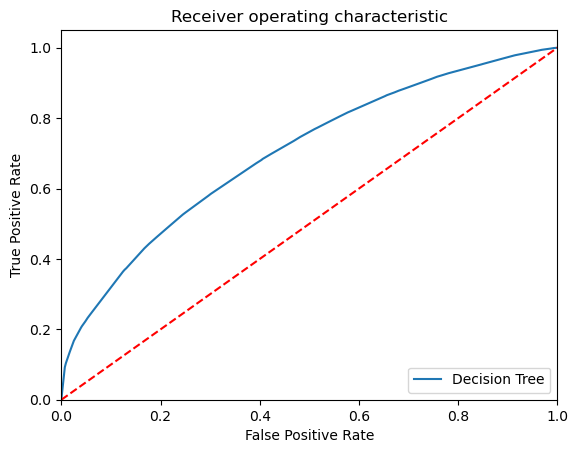

AUC: 0.701


In [16]:
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

#Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” 
#The feature importances always sum to 1

print("Feature importances:\n{}".format(tree.feature_importances_))

#Confusion Matrix
y_pred = tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))


In [17]:
!pip install gradio

     ---------------------------------------- 14.3/14.3 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 202.8/202.8 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB 2.4 MB/s eta 0:00:00
     ----------------------

In [18]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [23]:
import gradio as gr

def classify(trip_id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")

demo.launch()  

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [40]:
def sentence_builder(quantity, animal, countries, place, activity_list, morning):
    return f"""The {quantity} {animal}s from {" and ".join(countries)} went to the {place} where they {" and ".join(activity_list)} until the {"morning" if morning else "night"}"""


demo = gr.Interface(
    sentence_builder,
    [
        gr.Number(label="Animal"),
        gr.Dropdown(
            ["cat", "dog", "bird"], label="Animal", info="Will add more animals later!"
        ),
        gr.CheckboxGroup(["USA", "Japan", "Pakistan"], label="Countries", info="Where are they from?"),
        gr.Radio(["park", "zoo", "road"], label="Location", info="Where did they go?"),
        gr.Dropdown(
            ["ran", "swam", "ate", "slept"], value=["swam", "slept"], multiselect=True, label="Activity", info="Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed auctor, nisl eget ultricies aliquam, nunc nisl aliquet nunc, eget aliquam nisl nunc vel nisl."
        ),
        gr.Checkbox(label="Morning", info="Did they do it in the morning?"),
    ],
    "text",
    examples=[
        [2, "cat", "park", ["ran", "swam"], True],
        [4, "dog", "zoo", ["ate", "swam"], False],
        [10, "bird", "road", ["ran"], False],
        [8, "cat", "zoo", ["ate"], True],
    ],
)

if __name__ == "__main__":
    demo.launch()
Err

Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


NameError: name 'Err' is not defined

In [42]:
def delayclassifier(trip_id, Airline, Flight_ID, AirportFrom, AirportTo, DayOfWeek, Time, Length):
    return trip_id, Airline, Flight_ID, AirportFrom, AirportTo, DayOfWeek, Time, Length


demo = gr.Interface(
    delayclassifier,
    [
         gr.Number(label="Trip_ID"),
         gr.Dropdown(["1", "2", "3"], label="Airline"),
         gr.Number(label="Flight_ID"),
         gr.Dropdown(["1", "2", "3"], label="From"),
         gr.Dropdown(["1", "2", "3"], label="To"),
         gr.Slider(label="day of week", minimum = 0, maximum = 7),
         gr.Number(label="Time"),
         gr.Number(label="Length")
    ],
     "text"
    
)
if __name__ == "__main__":
    demo.launch()


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


In [43]:
gradio.UploadButton()

uploadbutton

In [45]:
def upload_file(files):
    file_paths = [file.name for file in files]
    return file_paths

with gr.Blocks() as demo:
    file_output = gr.File()
    upload_button = gr.UploadButton("Click to Upload a File", file_types=["image", "video"], file_count="multiple")
    upload_button.upload(upload_file, upload_button, file_output)
demo.launch()

Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


In [46]:
def filter_records(records, gender):
    return records[records["gender"] == gender]


demo = gr.Interface(
    filter_records,
    [
        gr.Dataframe(
            headers=["name", "age", "gender"],
            datatype=["str", "number", "str"],
            row_count=5,
            col_count=(3, "fixed"),
        ),
        gr.Dropdown(["M", "F", "O"]),
    ],
    "dataframe",
    description="Enter gender as 'M', 'F', or 'O' for other.",
)

if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.
